# 형태소 분석

In [1]:
#pip install kiwipiepy

In [2]:
from kiwipiepy import Kiwi
import pandas as pd

In [3]:
df = pd.read_excel('C:/Users/A/Desktop/데잇걸즈/6. 데모데이/TeamDD/2.리뷰데이터/4. 최종 데이터셋/total_review_검수완료_v4.xlsx')
df.head()

,review_index,product_name,product_id,score,date,color,color_sort,reshop,onemonth,category,review,Unnamed: 11,Unnamed: 12
0,1,하이버블 계란후라이 수세미,M3381177,5,2020-09-14,촉촉수세미사 01번 3볼+ 03번 1볼,0,0,0,디자이너 패키지,계란이 식빵보다는 쉽지만 초보자들 주의 그래도 정말 재밌고 귀여워요 무한 생산만이 남아,NaN,NaN
1,2,하이버블 계란후라이 수세미,M3381177,5,2020-04-19,촉촉수세미사 01번 3볼+ 03번 1볼,0,0,0,디자이너 패키지,계란이랑 딸기 수세미 만들었어요 거품도 잘 나고 좋아요,NaN,NaN
2,3,하이버블 계란후라이 수세미,M3381177,5,2020-06-06,촉촉수세미사 01번 3볼+ 03번 1볼,0,0,0,디자이너 패키지,네트백이랑 같이 주문했는데 아직 만들어보진 않았고 동영상 보면서 기본 연습 중이에요...,NaN,NaN
3,4,하이버블 계란후라이 수세미,M3381177,5,2020-03-23,촉촉수세미사 01번 3볼+ 03번 1볼,0,0,0,디자이너 패키지,달걀모양 귀여워요 뜨는 재미에 시간 가는 줄 모르겠어요,NaN,NaN
4,5,하이버블 계란후라이 수세미,M3381177,5,2020-02-09,촉촉수세미사 01번 3볼+ 03번 1볼,0,0,0,디자이너 패키지,동영상이랑 도안 너무 잘 되어있네요 구성도 너무 맘에 들고요 다른 것도 빨리 만들고...,NaN,NaN


In [4]:
kiwi = Kiwi()
morph_analysis = lambda x: kiwi.tokenize(x) if type(x) is str else None
df['review_tokenize'] = df['review'].apply(morph_analysis)

In [5]:
from collections import Counter
'''주요 품사, 용언 품사 정의'''
주요품사 = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'SL','VA-I']
용언품사 = ['VV', 'VA','VA-I']

'''Counter를 활용해 가장 많이 나온 n개의 품사 결과를 돌려주는 pos_count() 함수'''
def pos_count(df, col, output_filename, n=1000):
    카운터 = Counter()
    
    for index, row in df.iterrows(): 
        if row[col]:
            필터링결과 = [(token.form, token.tag) for token in row[col] if token.tag in 주요품사]
            카운터.update(필터링결과)
            
    with open(output_filename, "w", encoding='utf-8-sig') as output_file:
        print("형태소,품사,개수", file=output_file)
        for (형태소, 품사), 개수 in 카운터.most_common(n):
            if 품사 in 용언품사:
                형태소 += "다"
            print(f"{형태소},{품사},{개수}", file=output_file)

In [6]:
pos_count(df, 'review_tokenize', './주요어휘빈도.csv')

In [7]:
df_token = pd.read_csv('주요어휘빈도.csv')

In [8]:
df_token

,형태소,품사,개수
0,하다,VV,4792
1,좋다,VA,4636
2,뜨다,VV,3431
3,실,NNG,3120
4,만들다,VV,2948
...,...,...,...
995,지난번,NNG,6
996,춥다,VA-I,6
997,멀다,VA,6
998,급,NNG,6


In [9]:
def extract_noun(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['NNG', 'NNP']:
            yield token.form


In [10]:
def extract_verbe(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['VA', 'VV','VA-I']:
            yield token.form


In [11]:
df_token[df_token['품사'] == ('VA' or "VV" or "VA-I")]

,형태소,품사,개수
1,좋다,VA,4636
7,있다,VA,1687
8,같다,VA,1668
9,예쁘다,VA,1643
14,빠르다,VA,1285
...,...,...,...
952,하얗다,VA,6
963,알맞다,VA,6
975,적당하다,VA,6
986,삐뚤다,VA,6


In [12]:
df_token[df_token['품사'] == ('NNG' or "NNP")]

,형태소,품사,개수
3,실,NNG,3120
5,동영상,NNG,2001
12,배송,NNG,1407
13,처음,NNG,1322
15,설명,NNG,1258
...,...,...,...
993,독학,NNG,6
994,경우,NNG,6
995,지난번,NNG,6
998,급,NNG,6


# 워드클라우드

## 전체

In [13]:
from wordcloud import WordCloud

In [14]:
count_dic = dict(zip(df_token.형태소, df_token.개수))

In [15]:
sizes = set()
def get_font_size(*args, **kwargs):
    sizes.add(kwargs['font_size'])
    return 255, 0, 0

wc = WordCloud(color_func=get_font_size)
cloud = wc.fit_words(count_dic)

In [16]:
# 글꼴 크기를 로그 척도를 이용해 0-1로 변환

from matplotlib.colors import LogNorm
norm = LogNorm(vmin=min(sizes), vmax=max(sizes))

In [17]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Oranges')

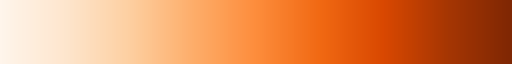

In [18]:
cmap

In [19]:
def set_color(*args, **kwargs):
    r, g, b, a = cmap(norm(kwargs['font_size']))
    return int(255 * r), int(255 * g), int(255 * b)

### 모양 바꾸기

In [20]:
from PIL import Image
import numpy as np
# mask = Image.open('thread6.png').convert('L') # convert('L')은 흑백으로 바꾸라는 뜻
# mask = np.asarray(mask)

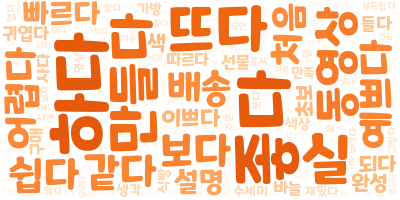

In [21]:
wc = WordCloud(font_path='Maplestory Bold.ttf', background_color='white', color_func=set_color)
cloud = wc.fit_words(count_dic)
cloud.to_image() 

# 코튼10 미니 스퀘어 가방

## 용언

In [22]:
cotton10 = df[df['product_name'] == '코튼10 미니 스퀘어 가방']

In [23]:
pos_count(cotton10, 'review_tokenize', './주요어휘빈도.csv')

cotton10_token = pd.read_csv('주요어휘빈도.csv')

In [24]:
df_v = cotton10_token[(cotton10_token['품사'] == "VA-I")|(cotton10_token['품사'] == "VA")|(cotton10_token['품사'] == "VV")]

In [25]:
count_dic = dict(zip(df_v.형태소, df_v.개수))
del count_dic['하다']
del count_dic['뜨다']
del count_dic['보다']
del count_dic['같다']
del count_dic['만들다']
del count_dic['들다']
del count_dic['좋다']
cloud = wc.fit_words(count_dic)

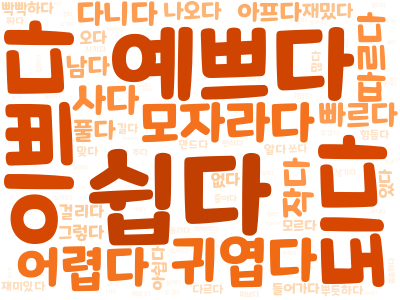

In [26]:
wc = WordCloud(
  font_path='Maplestory Bold.ttf', # 글꼴 파일이 있을 경우
  background_color='white',    # 배경색
  color_func=set_color, 
  max_words=150,               # 시각화할 단어 개수
  width=400,                   # 가로 크기
  height=300)                  # 세로 크기
cloud = wc.fit_words(count_dic)
cloud.to_image()

## 체언

In [27]:
df_n = cotton10_token[['형태소', '개수']][cotton10_token['품사'] == ('NNG' or "NNP")]

In [28]:
count_dic = dict(zip(df_n.형태소, df_n.개수))
cloud = wc.fit_words(count_dic)

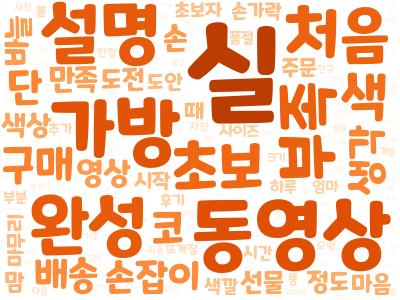

In [29]:
wc = WordCloud(
  font_path='Maplestory Bold.ttf', # 글꼴 파일이 있을 경우
  background_color='white',    # 배경색
  color_func=set_color, 
  max_words=150,               # 시각화할 단어 개수
  width=400,                   # 가로 크기
  height=300)                  # 세로 크기
cloud = wc.fit_words(count_dic)
cloud.to_image()

# 왕초보 식빵 수세미 뜨기

## 용언

In [40]:
sikbbang = df[df['product_name'] == '왕초보 식빵 수세미 뜨기']

In [41]:
pos_count(sikbbang, 'review_tokenize', './주요어휘빈도.csv')

sikbbang_token = pd.read_csv('주요어휘빈도.csv')

In [42]:
df_v = sikbbang_token[(sikbbang_token['품사'] == "VA-I")|(sikbbang_token['품사'] == "VA")|(sikbbang_token['품사'] == "VV")]

In [43]:
count_dic = dict(zip(df_v.형태소, df_v.개수))
del count_dic['있다']
del count_dic['같다']
del count_dic['하다']
del count_dic['보다']
cloud = wc.fit_words(count_dic)

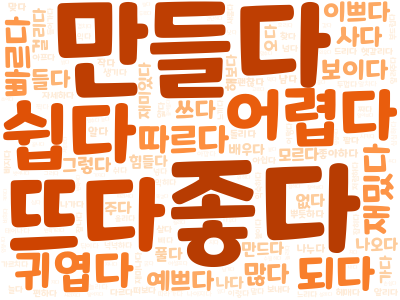

In [44]:
wc = WordCloud(
  font_path='Maplestory Bold.ttf', # 글꼴 파일이 있을 경우
  background_color='white',    # 배경색
  color_func=set_color, 
  max_words=150,               # 시각화할 단어 개수
  width=400,                   # 가로 크기
  height=300)                  # 세로 크기
cloud = wc.fit_words(count_dic)
cloud.to_image()

## 체언

In [45]:
df_n = sikbbang_token[['형태소', '개수']][sikbbang_token['품사'] == ('NNG' or "NNP")]

In [46]:
count_dic = dict(zip(df_n.형태소, df_n.개수))
cloud = wc.fit_words(count_dic)

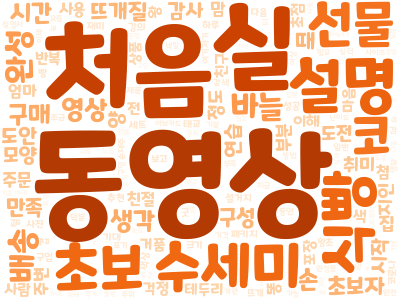

In [47]:
wc = WordCloud(
  font_path='Maplestory Bold.ttf', # 글꼴 파일이 있을 경우
  background_color='white',    # 배경색
  color_func=set_color, 
  max_words=150,               # 시각화할 단어 개수
  width=400,                   # 가로 크기
  height=300)                  # 세로 크기
cloud = wc.fit_words(count_dic)
cloud.to_image()